# In this notebook we are going to create a Logistic Regression model using python .
In this lesson our task is to build a classifier model to classify what kind of users on a social network will purchase a certain product that a company publish ads for based on previous customer data understand the dataset provided ('Social_Network_Ads.csv') carefully .Now, we will build our model let's get started !!

First we will start with importing some libraries.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

We have imported some libraries including the warnings to ignore the warning that jupyter throw on us.

In [6]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Above we have imported the dataset and print some of the data .Here the purchased column is for whether the customer based on the details provided purchased the product or not, we have to train our model to predict this column for future customer.

In [4]:
x= data.iloc[:,[2,3]].values
# print(x)
y=data.iloc[:,4].values
# print(y)

Above we have taken the 'Age' and 'EstimatedSalary' for our independent variable .Here we can take gender as our another independent variable and our model will find some correlation between the gender and purchased column that will further improve our model but we are droping this column because it will make our input data 3-D and we will print the graph for LR in 2-D .So, for that purpose we have dropped the gender column.

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Above we have split our dataset into train(To train the model) and test(To test the model) dataset . We have total 400 entries in our dataset and we have created the test set with 0.25 percent(test_size) which means test set will have 100 entries and train set will have 300 entries.

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


Above we have scaled our data as this classifier model does not provide us with the comfort of automatic scaling

In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Above we have imported the sklearn.linear_model library and from it we have called the LogisticRegression class to create our classifier and then we have trained our classsifier using the fit method with our training set

In [11]:
y_pred =classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

Above we have predicted the output for our test set using the predict method of our classifier which is trained over the training set

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]])

Above we have called the library sklearn.metrics and from it we have imported the class confusion_matrix and printed the confusion matrix for our y_test and y_pred itself .confusion matrix does a comparison between to classifier type array and gives details about how many predictions was wrong made by our classifier .


In the above matrix 68 people who didn't purchased the product were predicted correctly 65 times but our model gave 3 incorrect predictions and in the second case from a total of 32 people who purchased the product but our model predict 24 of them correctly with 8 incorrect predictions. So, a total of 11 wrong predictions.

confusion matrix is one way to compare between the performance or accuracy of different classifier models . So, one can choose the best for certain dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


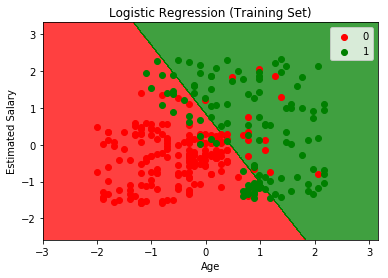

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                     np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c= ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Above we have plotted the graph for our Logistic Regression model , technically what we did do plot this graph is we predicted the outcome for each point on this graph with interval 0.01 and painted it red if outcome was 0 and green if outcome was 1  and due to such small interval we our observing region of red and green.

The boundary of the region is a straight line because it is plotted using a linear classifier which separates the outcomes using a straight line , does we are observing the nature of our classifier using the graph

Finally we have plotted the training set actual outcome with contour(dot), above we can see some green dots in red region and some red dots in green region those are the real values in y_train according to those inputs of x_train.

As we can see our model is not doing well but wait its the training set graph to actually judgea model we should always grade its performane in the test_set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


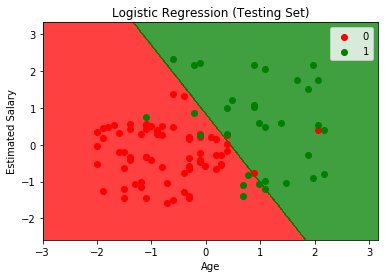

In [14]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),
                     np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c= ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Testing Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Above we have printed the same graph but with contour of our test set ,we can see there are still some green dots in the red region and vice-versa . we can even count the incorrect prediction as there are 8 green dot in red region and 3 red dot in the green region so a total of 11 incorrect prediction out of 100 inputs.just as our confusion matrix told us.